# CellChat analysis of Global DCM object

In [1]:
suppressMessages({
    library(plyr)
    library(CellChat)
    library(patchwork)
    library(SeuratDisk)
    library(Seurat)
    library(SingleCellExperiment)
    library(ggalluvial)
    library(repr)
    library(ggplot2)
    library(gplots)
    library(RColorBrewer)
    library(gplots)
    library(tidyr)
 })
options(stringsAsFactors = FALSE)

In [2]:
library(ComplexHeatmap)

Loading required package: grid

ComplexHeatmap version 2.6.2
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




In [3]:
sessionInfo()

R version 4.0.5 (2021-03-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.1 LTS

Matrix products: default
BLAS/LAPACK: /home/jovyan/my-conda-envs/R4.0.5_CellChat/lib/libopenblasp-r0.3.15.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      stats4    parallel  stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] ComplexHeatmap_2.6.2        tidyr_1.1.3                
 [3] RColorBrewer_1.1-2          gplots_3.1.1               
 [5] repr_1.1.3                  ggalluvial_0.12.3          
 [7] SingleCellExperiment_1.12.0 SummarizedExperiment_1.20.0
 [9] GenomicRange

In [4]:
'%!in%' <- function(x,y)!('%in%'(x,y))

In [5]:
options(future.globals.maxSize = 20000 * 1024 ^ 2)

In [6]:
OUTDIR <- "/home/jovyan/globus/CellChat/ALL_CELLSTATE_V8.1_out/"
dir.create(OUTDIR, showWarnings = FALSE)
setwd(OUTDIR)
getwd()

[1] "/home/jovyan/globus/CellChat/ALL_CELLSTATE_V8.1_out"

In [7]:
INDIR <- "/home/jovyan/globus/CellChat/CellChat_V8.1"

In [8]:
cellchat.PKP2.RV <- readRDS(file = file.path(INDIR, "cellchat_global_V8_PKP2_RV_CELLSTATES.rds"))

In [9]:
cellchat.TTN.RV <- readRDS(file = file.path(INDIR, "cellchat_global_V8_TTN_RV_CELLSTATES.rds"))

In [10]:
cellchat.RBM20.RV <- readRDS(file = file.path(INDIR, "cellchat_global_V8_RBM20_RV_CELLSTATES.rds"))

In [11]:
cellchat.LMNA.RV <- readRDS(file = file.path(INDIR, "cellchat_global_V8_LMNA_RV_CELLSTATES.rds"))

In [12]:
cellchat.PVneg.RV <- readRDS(file = file.path(INDIR, "cellchat_global_V8_PVneg_RV_CELLSTATES.rds"))

In [13]:
cellchat.control.RV <- readRDS(file = file.path(INDIR, "cellchat_global_V8_control_RV_CELLSTATES.rds"))

In [14]:
cellchat.PKP2.LV <- readRDS(file = file.path(INDIR, "cellchat_global_V8_PKP2_LV_CELLSTATES.rds"))

In [15]:
cellchat.TTN.LV <- readRDS(file = file.path(INDIR, "cellchat_global_V8_TTN_LV_CELLSTATES.rds"))

In [16]:
cellchat.RBM20.LV <- readRDS(file = file.path(INDIR, "cellchat_global_V8_RBM20_LV_CELLSTATES.rds"))

In [17]:
cellchat.LMNA.LV <- readRDS(file = file.path(INDIR, "cellchat_global_V8_LMNA_LV_CELLSTATES.rds"))

In [18]:
cellchat.PVneg.LV <- readRDS(file = file.path(INDIR, "cellchat_global_V8_PVneg_LV_CELLSTATES.rds"))

In [19]:
cellchat.control.LV <- readRDS(file = file.path(INDIR, "cellchat_global_V8_control_LV_CELLSTATES.rds"))

In [20]:
print(paste("control RV", length(levels(cellchat.control.RV@idents))))
print(paste("LMNA RV", length(levels(cellchat.LMNA.RV@idents))))
print(paste("PKP2 RV", length(levels(cellchat.PKP2.RV@idents))))
print(paste("TTN RV", length(levels(cellchat.TTN.RV@idents))))
print(paste("RBM20 RV", length(levels(cellchat.RBM20.RV@idents))))
print(paste("PVneg RV", length(levels(cellchat.PVneg.RV@idents))))
print(paste("control LV", length(levels(cellchat.control.LV@idents))))
print(paste("LMNA LV", length(levels(cellchat.LMNA.LV@idents))))
print(paste("PKP2 LV", length(levels(cellchat.PKP2.LV@idents))))
print(paste("TTN LV", length(levels(cellchat.TTN.LV@idents))))
print(paste("RBM20 LV", length(levels(cellchat.RBM20.LV@idents))))
print(paste("PVneg LV", length(levels(cellchat.PVneg.LV@idents))))

[1] "control RV 70"
[1] "LMNA RV 70"
[1] "PKP2 RV 69"
[1] "TTN RV 70"
[1] "RBM20 RV 70"
[1] "PVneg RV 70"
[1] "control LV 71"
[1] "LMNA LV 70"
[1] "PKP2 LV 70"
[1] "TTN LV 70"
[1] "RBM20 LV 70"
[1] "PVneg LV 70"


In [21]:
# Define the cell labels to lift up
group.new = levels(cellchat.control.LV@idents)
cellchat.control.RV.2 <- liftCellChat(cellchat.control.RV, group.new)
cellchat.PKP2.RV.2 <- liftCellChat(cellchat.PKP2.RV, group.new)
cellchat.TTN.RV.2 <- liftCellChat(cellchat.TTN.RV, group.new)
cellchat.RBM20.RV.2 <- liftCellChat(cellchat.RBM20.RV, group.new)
cellchat.LMNA.RV.2 <- liftCellChat(cellchat.LMNA.RV, group.new)
cellchat.PVneg.RV.2 <- liftCellChat(cellchat.PVneg.RV, group.new)

cellchat.control.LV.2 <- liftCellChat(cellchat.control.LV, group.new)
cellchat.PKP2.LV.2 <- liftCellChat(cellchat.PKP2.LV, group.new)
cellchat.TTN.LV.2 <- liftCellChat(cellchat.TTN.LV, group.new)
cellchat.RBM20.LV.2 <- liftCellChat(cellchat.RBM20.LV, group.new)
cellchat.LMNA.LV.2 <- liftCellChat(cellchat.LMNA.LV, group.new)
cellchat.PVneg.LV.2 <- liftCellChat(cellchat.PVneg.LV, group.new)

The CellChat object will be lifted up using the cell labels AD1.0, AD1.1, AD2, AD3, B, CD4T.act, CD4T.naive, CD4T.reg, CD8T.cytox, CD8T.em, CD8T.te, CD8T.te.IFNGhi, CD8T.trans, EC1.0, EC2.0, EC5.0, EC6.0, EC7.0, EC8.0, ILC, MAIT-like, MO.CD16, MO.VCAN, MP.FOLR2, MP.ISG, MP.LYVE1hi/MHCII.intermediate, MP.LYVE1hi/MHCII.lo, MP.LYVE1lo/MHCII.hi, MP.NFkB, MP.OSM, MP.TREM2, MP.transitional, Mast, Meso, NC1.0, NC1.1, NC1.2, NC1.3, NC2, NC3, NC4, NC5, NK.CD16hi, NK.CD16hiIFNGhi, NK.CD56hi, PC1, PC2, PC3, Plasma, SMC1.1, SMC1.2, SMC2, cDC1, cDC2, prolif.Lymphoids, prolif.Myeloids, vCM1.0, vCM1.1, vCM1.2, vCM1.3, vCM2, vCM3.0, vCM3.1, vCM4, vCM5, vFB1.0, vFB1.1, vFB1.2, vFB2, vFB3, vFB4



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels AD1.0, AD1.1, AD2, AD3, B, CD4T.act, CD4T.naive, CD4T.reg, CD8T.cytox, CD8T.em, CD8T.te, CD8T.te.IFNGhi, CD8T.trans, EC1.0, EC2.0, EC5.0, EC6.0, EC7.0, EC8.0, ILC, MAIT-like, MO.CD16, MO.VCAN, MP.FOLR2, MP.ISG, MP.LYVE1hi/MHCII.intermediate, MP.LYVE1hi/MHCII.lo, MP.LYVE1lo/MHCII.hi, MP.NFkB, MP.OSM, MP.TREM2, MP.transitional, Mast, Meso, NC1.0, NC1.1, NC1.2, NC1.3, NC2, NC3, NC4, NC5, NK.CD16hi, NK.CD16hiIFNGhi, NK.CD56hi, PC1, PC2, PC3, Plasma, SMC1.1, SMC1.2, SMC2, cDC1, cDC2, prolif.Lymphoids, prolif.Myeloids, vCM1.0, vCM1.1, vCM1.2, vCM1.3, vCM2, vCM3.0, vCM3.1, vCM4, vCM5, vFB1.0, vFB1.1, vFB1.2, vFB2, vFB3, vFB4



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels AD1.0, AD1.1, AD2, AD3, B, CD4T.act, CD4T.naive, CD4T.reg, CD8T.cytox, CD8T.em, CD8T.te, CD8T.te.IFNGhi, CD8T.trans, EC1.0, EC2.0, EC5.0, EC6.0, EC7.0, EC8.0, ILC, MAIT-like, MO.CD16, MO.VCAN, MP.FOLR2, MP.ISG, MP.LYVE1hi/MHCII.intermediate, MP.LYVE1hi/MHCII.lo, MP.LYVE1lo/MHCII.hi, MP.NFkB, MP.OSM, MP.TREM2, MP.transitional, Mast, Meso, NC1.0, NC1.1, NC1.2, NC1.3, NC2, NC3, NC4, NC5, NK.CD16hi, NK.CD16hiIFNGhi, NK.CD56hi, PC1, PC2, PC3, Plasma, SMC1.1, SMC1.2, SMC2, cDC1, cDC2, prolif.Lymphoids, prolif.Myeloids, vCM1.0, vCM1.1, vCM1.2, vCM1.3, vCM2, vCM3.0, vCM3.1, vCM4, vCM5, vFB1.0, vFB1.1, vFB1.2, vFB2, vFB3, vFB4



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels AD1.0, AD1.1, AD2, AD3, B, CD4T.act, CD4T.naive, CD4T.reg, CD8T.cytox, CD8T.em, CD8T.te, CD8T.te.IFNGhi, CD8T.trans, EC1.0, EC2.0, EC5.0, EC6.0, EC7.0, EC8.0, ILC, MAIT-like, MO.CD16, MO.VCAN, MP.FOLR2, MP.ISG, MP.LYVE1hi/MHCII.intermediate, MP.LYVE1hi/MHCII.lo, MP.LYVE1lo/MHCII.hi, MP.NFkB, MP.OSM, MP.TREM2, MP.transitional, Mast, Meso, NC1.0, NC1.1, NC1.2, NC1.3, NC2, NC3, NC4, NC5, NK.CD16hi, NK.CD16hiIFNGhi, NK.CD56hi, PC1, PC2, PC3, Plasma, SMC1.1, SMC1.2, SMC2, cDC1, cDC2, prolif.Lymphoids, prolif.Myeloids, vCM1.0, vCM1.1, vCM1.2, vCM1.3, vCM2, vCM3.0, vCM3.1, vCM4, vCM5, vFB1.0, vFB1.1, vFB1.2, vFB2, vFB3, vFB4



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels AD1.0, AD1.1, AD2, AD3, B, CD4T.act, CD4T.naive, CD4T.reg, CD8T.cytox, CD8T.em, CD8T.te, CD8T.te.IFNGhi, CD8T.trans, EC1.0, EC2.0, EC5.0, EC6.0, EC7.0, EC8.0, ILC, MAIT-like, MO.CD16, MO.VCAN, MP.FOLR2, MP.ISG, MP.LYVE1hi/MHCII.intermediate, MP.LYVE1hi/MHCII.lo, MP.LYVE1lo/MHCII.hi, MP.NFkB, MP.OSM, MP.TREM2, MP.transitional, Mast, Meso, NC1.0, NC1.1, NC1.2, NC1.3, NC2, NC3, NC4, NC5, NK.CD16hi, NK.CD16hiIFNGhi, NK.CD56hi, PC1, PC2, PC3, Plasma, SMC1.1, SMC1.2, SMC2, cDC1, cDC2, prolif.Lymphoids, prolif.Myeloids, vCM1.0, vCM1.1, vCM1.2, vCM1.3, vCM2, vCM3.0, vCM3.1, vCM4, vCM5, vFB1.0, vFB1.1, vFB1.2, vFB2, vFB3, vFB4



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels AD1.0, AD1.1, AD2, AD3, B, CD4T.act, CD4T.naive, CD4T.reg, CD8T.cytox, CD8T.em, CD8T.te, CD8T.te.IFNGhi, CD8T.trans, EC1.0, EC2.0, EC5.0, EC6.0, EC7.0, EC8.0, ILC, MAIT-like, MO.CD16, MO.VCAN, MP.FOLR2, MP.ISG, MP.LYVE1hi/MHCII.intermediate, MP.LYVE1hi/MHCII.lo, MP.LYVE1lo/MHCII.hi, MP.NFkB, MP.OSM, MP.TREM2, MP.transitional, Mast, Meso, NC1.0, NC1.1, NC1.2, NC1.3, NC2, NC3, NC4, NC5, NK.CD16hi, NK.CD16hiIFNGhi, NK.CD56hi, PC1, PC2, PC3, Plasma, SMC1.1, SMC1.2, SMC2, cDC1, cDC2, prolif.Lymphoids, prolif.Myeloids, vCM1.0, vCM1.1, vCM1.2, vCM1.3, vCM2, vCM3.0, vCM3.1, vCM4, vCM5, vFB1.0, vFB1.1, vFB1.2, vFB2, vFB3, vFB4



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels AD1.0, AD1.1, AD2, AD3, B, CD4T.act, CD4T.naive, CD4T.reg, CD8T.cytox, CD8T.em, CD8T.te, CD8T.te.IFNGhi, CD8T.trans, EC1.0, EC2.0, EC5.0, EC6.0, EC7.0, EC8.0, ILC, MAIT-like, MO.CD16, MO.VCAN, MP.FOLR2, MP.ISG, MP.LYVE1hi/MHCII.intermediate, MP.LYVE1hi/MHCII.lo, MP.LYVE1lo/MHCII.hi, MP.NFkB, MP.OSM, MP.TREM2, MP.transitional, Mast, Meso, NC1.0, NC1.1, NC1.2, NC1.3, NC2, NC3, NC4, NC5, NK.CD16hi, NK.CD16hiIFNGhi, NK.CD56hi, PC1, PC2, PC3, Plasma, SMC1.1, SMC1.2, SMC2, cDC1, cDC2, prolif.Lymphoids, prolif.Myeloids, vCM1.0, vCM1.1, vCM1.2, vCM1.3, vCM2, vCM3.0, vCM3.1, vCM4, vCM5, vFB1.0, vFB1.1, vFB1.2, vFB2, vFB3, vFB4



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels AD1.0, AD1.1, AD2, AD3, B, CD4T.act, CD4T.naive, CD4T.reg, CD8T.cytox, CD8T.em, CD8T.te, CD8T.te.IFNGhi, CD8T.trans, EC1.0, EC2.0, EC5.0, EC6.0, EC7.0, EC8.0, ILC, MAIT-like, MO.CD16, MO.VCAN, MP.FOLR2, MP.ISG, MP.LYVE1hi/MHCII.intermediate, MP.LYVE1hi/MHCII.lo, MP.LYVE1lo/MHCII.hi, MP.NFkB, MP.OSM, MP.TREM2, MP.transitional, Mast, Meso, NC1.0, NC1.1, NC1.2, NC1.3, NC2, NC3, NC4, NC5, NK.CD16hi, NK.CD16hiIFNGhi, NK.CD56hi, PC1, PC2, PC3, Plasma, SMC1.1, SMC1.2, SMC2, cDC1, cDC2, prolif.Lymphoids, prolif.Myeloids, vCM1.0, vCM1.1, vCM1.2, vCM1.3, vCM2, vCM3.0, vCM3.1, vCM4, vCM5, vFB1.0, vFB1.1, vFB1.2, vFB2, vFB3, vFB4



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels AD1.0, AD1.1, AD2, AD3, B, CD4T.act, CD4T.naive, CD4T.reg, CD8T.cytox, CD8T.em, CD8T.te, CD8T.te.IFNGhi, CD8T.trans, EC1.0, EC2.0, EC5.0, EC6.0, EC7.0, EC8.0, ILC, MAIT-like, MO.CD16, MO.VCAN, MP.FOLR2, MP.ISG, MP.LYVE1hi/MHCII.intermediate, MP.LYVE1hi/MHCII.lo, MP.LYVE1lo/MHCII.hi, MP.NFkB, MP.OSM, MP.TREM2, MP.transitional, Mast, Meso, NC1.0, NC1.1, NC1.2, NC1.3, NC2, NC3, NC4, NC5, NK.CD16hi, NK.CD16hiIFNGhi, NK.CD56hi, PC1, PC2, PC3, Plasma, SMC1.1, SMC1.2, SMC2, cDC1, cDC2, prolif.Lymphoids, prolif.Myeloids, vCM1.0, vCM1.1, vCM1.2, vCM1.3, vCM2, vCM3.0, vCM3.1, vCM4, vCM5, vFB1.0, vFB1.1, vFB1.2, vFB2, vFB3, vFB4



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels AD1.0, AD1.1, AD2, AD3, B, CD4T.act, CD4T.naive, CD4T.reg, CD8T.cytox, CD8T.em, CD8T.te, CD8T.te.IFNGhi, CD8T.trans, EC1.0, EC2.0, EC5.0, EC6.0, EC7.0, EC8.0, ILC, MAIT-like, MO.CD16, MO.VCAN, MP.FOLR2, MP.ISG, MP.LYVE1hi/MHCII.intermediate, MP.LYVE1hi/MHCII.lo, MP.LYVE1lo/MHCII.hi, MP.NFkB, MP.OSM, MP.TREM2, MP.transitional, Mast, Meso, NC1.0, NC1.1, NC1.2, NC1.3, NC2, NC3, NC4, NC5, NK.CD16hi, NK.CD16hiIFNGhi, NK.CD56hi, PC1, PC2, PC3, Plasma, SMC1.1, SMC1.2, SMC2, cDC1, cDC2, prolif.Lymphoids, prolif.Myeloids, vCM1.0, vCM1.1, vCM1.2, vCM1.3, vCM2, vCM3.0, vCM3.1, vCM4, vCM5, vFB1.0, vFB1.1, vFB1.2, vFB2, vFB3, vFB4



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels AD1.0, AD1.1, AD2, AD3, B, CD4T.act, CD4T.naive, CD4T.reg, CD8T.cytox, CD8T.em, CD8T.te, CD8T.te.IFNGhi, CD8T.trans, EC1.0, EC2.0, EC5.0, EC6.0, EC7.0, EC8.0, ILC, MAIT-like, MO.CD16, MO.VCAN, MP.FOLR2, MP.ISG, MP.LYVE1hi/MHCII.intermediate, MP.LYVE1hi/MHCII.lo, MP.LYVE1lo/MHCII.hi, MP.NFkB, MP.OSM, MP.TREM2, MP.transitional, Mast, Meso, NC1.0, NC1.1, NC1.2, NC1.3, NC2, NC3, NC4, NC5, NK.CD16hi, NK.CD16hiIFNGhi, NK.CD56hi, PC1, PC2, PC3, Plasma, SMC1.1, SMC1.2, SMC2, cDC1, cDC2, prolif.Lymphoids, prolif.Myeloids, vCM1.0, vCM1.1, vCM1.2, vCM1.3, vCM2, vCM3.0, vCM3.1, vCM4, vCM5, vFB1.0, vFB1.1, vFB1.2, vFB2, vFB3, vFB4



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels AD1.0, AD1.1, AD2, AD3, B, CD4T.act, CD4T.naive, CD4T.reg, CD8T.cytox, CD8T.em, CD8T.te, CD8T.te.IFNGhi, CD8T.trans, EC1.0, EC2.0, EC5.0, EC6.0, EC7.0, EC8.0, ILC, MAIT-like, MO.CD16, MO.VCAN, MP.FOLR2, MP.ISG, MP.LYVE1hi/MHCII.intermediate, MP.LYVE1hi/MHCII.lo, MP.LYVE1lo/MHCII.hi, MP.NFkB, MP.OSM, MP.TREM2, MP.transitional, Mast, Meso, NC1.0, NC1.1, NC1.2, NC1.3, NC2, NC3, NC4, NC5, NK.CD16hi, NK.CD16hiIFNGhi, NK.CD56hi, PC1, PC2, PC3, Plasma, SMC1.1, SMC1.2, SMC2, cDC1, cDC2, prolif.Lymphoids, prolif.Myeloids, vCM1.0, vCM1.1, vCM1.2, vCM1.3, vCM2, vCM3.0, vCM3.1, vCM4, vCM5, vFB1.0, vFB1.1, vFB1.2, vFB2, vFB3, vFB4



Update slots object@net, object@netP, object@idents in a single dataset... 


In [22]:
rm(list = c('cellchat.control.RV','cellchat.PKP2.RV','cellchat.TTN.RV', 'cellchat.RBM20.RV', 'cellchat.LMNA.RV','cellchat.PVneg.RV','cellchat.control.LV','cellchat.PKP2.LV','cellchat.TTN.LV','cellchat.RBM20.LV','cellchat.LMNA.LV','cellchat.PVneg.LV'))

In [23]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,8095553,432.4,13087892,699.0,13087892,699.0
Vcells,2614812338,19949.5,4089892757,31203.5,2835412229,21632.5


In [24]:
object.list <- list(control.LV = cellchat.control.LV.2
                  , LMNA.LV = cellchat.LMNA.LV.2
                  , TTN.LV = cellchat.TTN.LV.2
                  , RBM20.LV = cellchat.RBM20.LV.2
                  , PKP2.LV = cellchat.PKP2.LV.2
                  , PVneg.LV = cellchat.PVneg.LV.2
                  , control.RV = cellchat.control.RV.2
                  , LMNA.RV = cellchat.LMNA.RV.2
                  , TTN.RV = cellchat.TTN.RV.2
                  , RBM20.RV = cellchat.RBM20.RV.2
                  , PKP2.RV = cellchat.PKP2.RV.2
                  , PVneg.RV = cellchat.PVneg.RV.2 
                   )

In [25]:
CELLSTATE_CELLTYPE_map <- distinct(cellchat.control.LV.2@meta[c('cell_states','cell_type')])
CELLSTATE_CELLTYPE_map <- data.frame(lapply(CELLSTATE_CELLTYPE_map, as.character), stringsAsFactors=FALSE)
head(CELLSTATE_CELLTYPE_map)

,cell_states,cell_type
,<chr>,<chr>
1,SMC1.2,Mural
2,vCM1.0,CM
3,vCM2,CM
4,EC8.0,EC
5,PC1,Mural
6,vCM3.0,CM


In [26]:
group.CELLTYPE <- mapvalues(group.new, from=CELLSTATE_CELLTYPE_map$cell_states, to=CELLSTATE_CELLTYPE_map$cell_type)

In [27]:
group.CELLTYPE <- factor(group.CELLTYPE)

In [28]:
levels(group.CELLTYPE)

[1] "AD"       "CM"       "EC"       "FB"       "Lymphoid" "Mast"     "Mural"   
[8] "Myeloid"  "NC"

In [29]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,8108387,433.1,13087892,699.0,13087892,699.0
Vcells,2614840732,19949.7,4089892757,31203.5,2835412229,21632.5


In [30]:
object.list <- lapply(object.list, function(x) {mergeInteractions(x, group.CELLTYPE)})
#object.list <- lapply(object.list, function(x) {mergeInteractionsUnique(x, group.CELLTYPE)})
gc()
cellchat <- mergeCellChat(object.list, add.names = names(object.list))
#> Merge the following slots: 'data.signaling','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,8109732,433.2,13087892,699.0,13087892,699.0
Vcells,2614845638,19949.7,4089892757,31203.5,2835412229,21632.5


Merge the following slots: 'data.signaling','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.



In [31]:
cellchat

An object of class CellChat created from a merged object with multiple datasets 
 1011 signaling genes.
 707257 cells.

In [32]:
saveRDS(cellchat, file = file.path(INDIR, "cellchat_global_V8_ALL_CELLSTATES.rds"))

In [33]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,8114709,433.4,13087892,699.0,13087892,699.0
Vcells,2675214790,20410.3,7251601829,55325.4,8599047449,65605.6


In [34]:
genotypes <- names(cellchat@net)

## Make heatmaps

In [35]:
options(repr.plot.width = 6, repr.plot.height = 6)

heatmap.df <- list(contrib = data.frame(matrix(ncol = 0, nrow = 0)), pval = data.frame(matrix(ncol = 0, nrow = 0)))

for (i in c(2:6)){
    gg <- rankNet(cellchat, mode = "comparison", comparison=c(1,i)
            , title= genotypes[i]
            , cutoff.pvalue = 0.05
            , stacked = T, show.raw = T, do.stat = TRUE, return.data = FALSE)
    temp <- data.frame(gg$data[gg$data$group == levels(gg$data$group)[1],c("contribution", "pvalues")], control.contribution=gg$data[gg$data$group == levels(gg$data$group)[2],c("contribution")], row.names = rownames(gg$data)[gg$data$group == levels(gg$data$group)[2]])
    temp2 <- data.frame((temp[,1]/temp[,3]), row.names = rownames(temp))
    colnames(temp2) <- genotypes[i]
    if(sum(dim(heatmap.df$contrib) == c(0,0))){
        heatmap.df$contrib <- temp2
    } else{
        heatmap.df$contrib <- merge(heatmap.df$contrib, temp2, all = TRUE, by = "row.names")
        rownames(heatmap.df$contrib) <- heatmap.df$contrib$Row.names
        heatmap.df$contrib <- heatmap.df$contrib[,c(-1)]
    }
    
    #temp2 <- data.frame(temp[,2], row.names = rownames(temp))
    temp2 <- data.frame(p.adjust(temp[,2], method="bonferroni"), row.names = rownames(temp))
    colnames(temp2) <- genotypes[i]
    if(sum(dim(heatmap.df$pval) == c(0,0))){
        heatmap.df$pval <- temp2
    } else {
        heatmap.df$pval <- merge(heatmap.df$pval, temp2, all = TRUE, by = "row.names")
        rownames(heatmap.df$pval) <- heatmap.df$pval$Row.names
        heatmap.df$pval <- heatmap.df$pval[,c(-1)]
    }
}

for (i in c(8:12)){
    gg <- rankNet(cellchat, mode = "comparison", comparison=c(7,i)
            , title= genotypes[i]
            , cutoff.pvalue = 0.05
            , stacked = T, show.raw = T, do.stat = TRUE, return.data = FALSE)
    temp <- data.frame(gg$data[gg$data$group == levels(gg$data$group)[1],c("contribution", "pvalues")], control.contribution=gg$data[gg$data$group == levels(gg$data$group)[2],c("contribution")], row.names = rownames(gg$data)[gg$data$group == levels(gg$data$group)[2]])
    #temp[temp[,1] == 0, 1] <- 1e-10
    #temp[temp[,3] == 0, 3] <- 1e-10
    temp2 <- data.frame((temp[,1]/temp[,3]), row.names = rownames(temp))
    colnames(temp2) <- genotypes[i]
    if(sum(dim(heatmap.df$contrib) == c(0,0))){
        heatmap.df$contrib <- temp2
    } else{
        heatmap.df$contrib <- merge(heatmap.df$contrib, temp2, all = TRUE, by = "row.names")
        rownames(heatmap.df$contrib) <- heatmap.df$contrib$Row.names
        heatmap.df$contrib <- heatmap.df$contrib[,c(-1)]
    }
    
    #temp2 <- data.frame(temp[,2], row.names = rownames(temp))
    temp2 <- data.frame(p.adjust(temp[,2], method="bonferroni"), row.names = rownames(temp))
    colnames(temp2) <- genotypes[i]
    if(sum(dim(heatmap.df$pval) == c(0,0))){
        heatmap.df$pval <- temp2
    } else {
        heatmap.df$pval <- merge(heatmap.df$pval, temp2, all = TRUE, by = "row.names")
        rownames(heatmap.df$pval) <- heatmap.df$pval$Row.names
        heatmap.df$pval <- heatmap.df$pval[,c(-1)]
    }
}

heatmap.df$contrib <- log2(heatmap.df$contrib)

heatmap.df$pval <- data.frame(sapply(heatmap.df$pval, as.numeric), row.names=rownames(heatmap.df$pval))
heatmap.df$contrib <- data.frame(sapply(heatmap.df$contrib, as.numeric), row.names=rownames(heatmap.df$contrib))

In [36]:
temp <- heatmap.df$contrib
temp$Pathway <- rownames(temp)
heatmap.df.contrib.wide <- gather(temp, Group, log2FC_contrib, LMNA.LV:PVneg.RV, factor_key=TRUE)
print(dim(heatmap.df.contrib.wide))
head(heatmap.df.contrib.wide)

[1] 990   3


,Pathway,Group,log2FC_contrib
,<chr>,<fct>,<dbl>
1,ACTIVIN,LMNA.LV,NA
2,ADGRE5,LMNA.LV,3.089689
3,ADIPONECTIN,LMNA.LV,2.229459
4,AGT,LMNA.LV,NA
5,ALCAM,LMNA.LV,6.065782
6,ANGPT,LMNA.LV,1.657129


In [37]:
temp <- heatmap.df$pval
temp$Pathway <- rownames(temp)
heatmap.df.pval.wide <- gather(temp, Group, adjusted_pval, LMNA.LV:PVneg.RV, factor_key=TRUE)
print(dim(heatmap.df.pval.wide))
head(heatmap.df.pval.wide)

[1] 990   3


,Pathway,Group,adjusted_pval
,<chr>,<fct>,<dbl>
1,ACTIVIN,LMNA.LV,NA
2,ADGRE5,LMNA.LV,2.200591e-02
3,ADIPONECTIN,LMNA.LV,3.153722e-03
4,AGT,LMNA.LV,NA
5,ALCAM,LMNA.LV,1.264511e-04
6,ANGPT,LMNA.LV,6.634529e-09


In [38]:
heatmap.df.wide <- merge(heatmap.df.contrib.wide, heatmap.df.pval.wide, by=c("Pathway","Group"), all.x = TRUE, all.y = TRUE)
write.csv(heatmap.df.wide, file='rankNet_heatmap_all_CELLTYPE_data.csv', row.names=FALSE)

In [39]:
MAX.CONTRIB <- max(abs(heatmap.df$contrib[!(sapply(heatmap.df$contrib, is.infinite) | is.na(heatmap.df$contrib))]))
MAX.CONTRIB <- round(MAX.CONTRIB)
MAX.CONTRIB

[1] 14

In [40]:
INF.VALUE <- MAX.CONTRIB+1
INF.VALUE

[1] 15

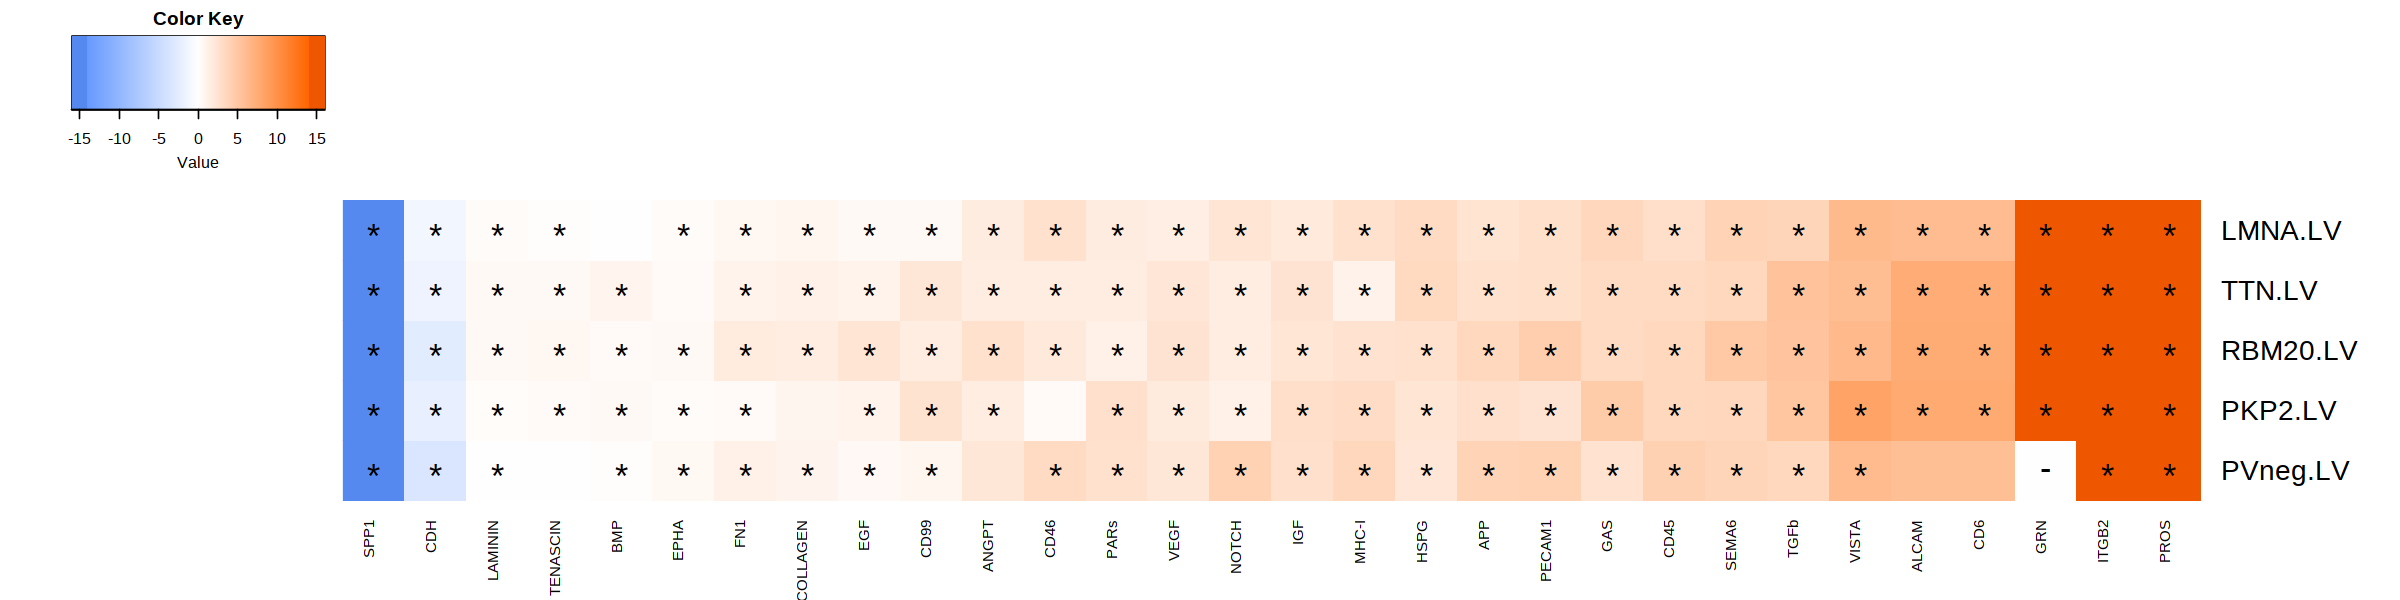

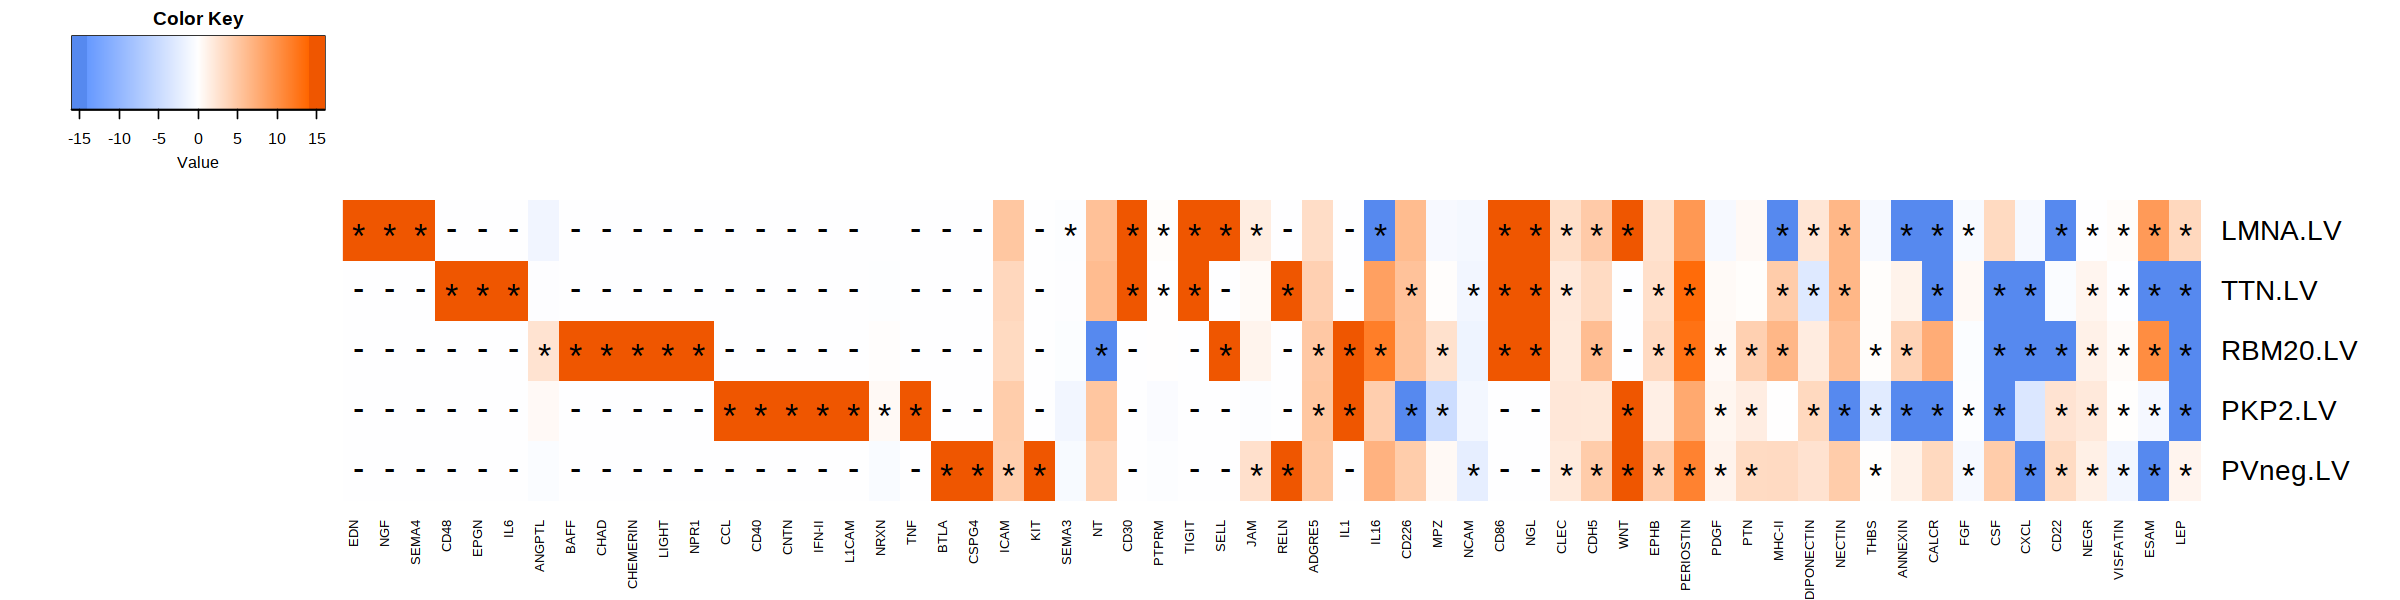

In [41]:
options(repr.plot.width = 20, repr.plot.height = 5)

heatmap.df2 <- heatmap.df

heatmap.df2$contrib[sapply(heatmap.df2$contrib, is.infinite) & heatmap.df2$contrib > 0] <- INF.VALUE
heatmap.df2$contrib[sapply(heatmap.df2$contrib, is.infinite) & heatmap.df2$contrib < 0] <- -INF.VALUE

heatmap.df2$pval[is.na(heatmap.df2$pval)] <- 2

heatmap.df2$pval <- heatmap.df2$pval[,grepl('LV',colnames(heatmap.df2$contrib))]
heatmap.df2$contrib <- heatmap.df2$contrib[,grepl('LV',colnames(heatmap.df2$contrib))]

heatmap.df2$pval <- heatmap.df2$pval[(apply(is.na(heatmap.df2$contrib), 1, sum) < 5),]
heatmap.df2$contrib <- heatmap.df2$contrib[(apply(is.na(heatmap.df2$contrib), 1, sum) < 5),]

heatmap.df2$contrib <- heatmap.df2$contrib[(apply(heatmap.df2$pval > 0.01, 1, sum) < 5),]
heatmap.df2$pval <- heatmap.df2$pval[(apply(heatmap.df2$pval > 0.01, 1, sum) < 5),]

heatmap.df2$pval[heatmap.df2$pval == 2] <- NA

heatmap.df2$sig <- heatmap.df2$pval
heatmap.df2$sig[] <- ''
heatmap.df2$sig[heatmap.df2$pval <= 0.01] <- '*'

heatmap.df2$sig[is.na(heatmap.df2$pval)] <- '-'

heatmap.df2$contrib[is.na(heatmap.df2$contrib)] <- 0

heatmap.df2$sig <- heatmap.df2$sig[,c('LMNA.LV','TTN.LV','RBM20.LV','PKP2.LV','PVneg.LV')]
heatmap.df2$pval <- heatmap.df2$pval[,c('LMNA.LV','TTN.LV','RBM20.LV','PKP2.LV','PVneg.LV')]
heatmap.df2$contrib <- heatmap.df2$contrib[,c('LMNA.LV','TTN.LV','RBM20.LV','PKP2.LV','PVneg.LV')]

scale.interval.size <- 0.05
num_breaks <- (MAX.CONTRIB * 2 / scale.interval.size)+1
breaks <- c(-(INF.VALUE+1), seq(from=-MAX.CONTRIB, to=MAX.CONTRIB, length.out=num_breaks), INF.VALUE+1)
midpoint <- 0 # the mid of the "real" scale

rampCol2 <- colorRampPalette(c("#6699FF", "white", "#FF6600"))(length(breaks)-1)
mypalette <- c(rampCol2)
mypalette[1] <- "#5689EF" # just a random extreme color for -inf
mypalette[num_breaks+1] <- "#EF5600" # just a random extreme color for inf


options(repr.plot.width = 20, repr.plot.height = 5)

heatmap.df3 <- heatmap.df2
heatmap.df4 <- heatmap.df2

heatmap.df3$contrib <- heatmap.df2$contrib[(apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) >=4 & apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) == 0)
                                           |(apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) >=4 & apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) == 0) ,]
heatmap.df3$sig <- heatmap.df2$sig[(apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) >=4 & apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) == 0)
                                           |(apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) >=4 & apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) == 0) ,]
heatmap.df3$sig <- heatmap.df3$sig[order(apply(heatmap.df3$contrib, 1, mean)),]
heatmap.df3$contrib <- heatmap.df3$contrib[order(apply(heatmap.df3$contrib, 1, mean)),]

heatmap.df4$contrib <- heatmap.df2$contrib[!((apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) >=4 & apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) == 0)
                                           |(apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) >=4 & apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) == 0)) ,]
heatmap.df4$sig <- heatmap.df2$sig[!((apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) >=4 & apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) == 0)
                                           |(apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) >=4 & apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) == 0)) ,]

heatmap.df4$contrib <- heatmap.df4$contrib[with(data.frame(heatmap.df4$sig == '*'), order(-LMNA.LV,-TTN.LV,-RBM20.LV,-PKP2.LV,-PVneg.LV)),]
heatmap.df4$sig <- heatmap.df4$sig[with(data.frame(heatmap.df4$sig == '*'), order(-LMNA.LV,-TTN.LV,-RBM20.LV,-PKP2.LV,-PVneg.LV)),]

heatmap.df4$change <- heatmap.df4$contrib
heatmap.df4$change[] <- 0
heatmap.df4$change[heatmap.df4$contrib > 0 & heatmap.df4$sig != ''] <- 1
heatmap.df4$change[heatmap.df4$contrib < 0 & heatmap.df4$sig != ''] <- -1
heatmap.df4$sig <- heatmap.df4$sig[order(apply(heatmap.df4$change, 1, sum), decreasing = TRUE),]
heatmap.df4$contrib <- heatmap.df4$contrib[order(apply(heatmap.df4$change, 1, sum), decreasing = TRUE),]

heatmap.df4$contrib <- heatmap.df4$contrib[order(apply(heatmap.df4$sig == '*', 1, sum)),]
heatmap.df4$sig <- heatmap.df4$sig[order(apply(heatmap.df4$sig == '*', 1, sum)),]

heatmap.2(t(heatmap.df3$contrib)
        , col=mypalette
        , Rowv=NULL  
        , Colv=NULL
        , dendrogram="none"
        , na.rm = TRUE
        , breaks=breaks, density.info="none", trace="none"
        , symm=F,symkey=F,symbreaks=T, scale="none"
        , margins = c(5,10)
        , lhei=c(2,4), lwid=c(1,6)
        , cellnote = t(heatmap.df3$sig)
        ,notecex=2.0
        ,notecol="black"
       )

heatmap.2(t(heatmap.df4$contrib)
        , col=mypalette
        , Rowv=NULL  
        , Colv=NULL
        , dendrogram="none"
        , na.rm = TRUE
        , breaks=breaks, density.info="none", trace="none"
        , symm=F,symkey=F,symbreaks=T, scale="none"
        , margins = c(5,10)
        , lhei=c(2,4), lwid=c(1,6)
        , cellnote = t(heatmap.df4$sig)
        ,notecex=2.0
        ,notecol="black"
       )

In [42]:
breaks

[1] -16.00 -14.00 -13.95 -13.90 -13.85 -13.80 -13.75 -13.70 -13.65 -13.60
 [11] -13.55 -13.50 -13.45 -13.40 -13.35 -13.30 -13.25 -13.20 -13.15 -13.10
 [21] -13.05 -13.00 -12.95 -12.90 -12.85 -12.80 -12.75 -12.70 -12.65 -12.60
 [31] -12.55 -12.50 -12.45 -12.40 -12.35 -12.30 -12.25 -12.20 -12.15 -12.10
 [41] -12.05 -12.00 -11.95 -11.90 -11.85 -11.80 -11.75 -11.70 -11.65 -11.60
 [51] -11.55 -11.50 -11.45 -11.40 -11.35 -11.30 -11.25 -11.20 -11.15 -11.10
 [61] -11.05 -11.00 -10.95 -10.90 -10.85 -10.80 -10.75 -10.70 -10.65 -10.60
 [71] -10.55 -10.50 -10.45 -10.40 -10.35 -10.30 -10.25 -10.20 -10.15 -10.10
 [81] -10.05 -10.00  -9.95  -9.90  -9.85  -9.80  -9.75  -9.70  -9.65  -9.60
 [91]  -9.55  -9.50  -9.45  -9.40  -9.35  -9.30  -9.25  -9.20  -9.15  -9.10
[101]  -9.05  -9.00  -8.95  -8.90  -8.85  -8.80  -8.75  -8.70  -8.65  -8.60
[111]  -8.55  -8.50  -8.45  -8.40  -8.35  -8.30  -8.25  -8.20  -8.15  -8.10
[121]  -8.05  -8.00  -7.95  -7.90  -7.85  -7.80  -7.75  -7.70  -7.65  -7.60
[131]  -7.55  -7.50  -7.45  -7.40  -7.35  -7.30  -7.25  -7.20  -7.15  -7.10
[141]  -7.05  -7.00  -6.95  -6.90  -6.85  -6.80  -6.75  -6.70  -6.65  -6.60
[151]  -6.55  -6.50  -6.45  -6.40  -6.35  -6.30  -6.25  -6.20  -6.15  -6.10
[161]  -6.05  -6.00  -5.95  -5.90  -5.85  -5.80  -5.75  -5.70  -5.65  -5.60
[171]  -5.55  -5.50  -5.45  -5.40  -5.35  -5.30  -5.25  -5.20  -5.15  -5.10
[181]  -5.05  -5.00  -4.95  -4.90  -4.85  -4.80  -4.75  -4.70  -4.65  -4.60
[191]  -4.55  -4.50  -4.45  -4.40  -4.35  -4.30  -4.25  -4.20  -4.15  -4.10
[201]  -4.05  -4.00  -3.95  -3.90  -3.85  -3.80  -3.75  -3.70  -3.65  -3.60
[211]  -3.55  -3.50  -3.45  -3.40  -3.35  -3.30  -3.25  -3.20  -3.15  -3.10
[221]  -3.05  -3.00  -2.95  -2.90  -2.85  -2.80  -2.75  -2.70  -2.65  -2.60
[231]  -2.55  -2.50  -2.45  -2.40  -2.35  -2.30  -2.25  -2.20  -2.15  -2.10
[241]  -2.05  -2.00  -1.95  -1.90  -1.85  -1.80  -1.75  -1.70  -1.65  -1.60
[251]  -1.55  -1.50  -1.45  -1.40  -1.35  -1.30  -1.25  -1.20  -1.15  -1.10
[261]  -1.05  -1.00  -0.95  -0.90  -0.85  -0.80  -0.75  -0.70  -0.65  -0.60
[271]  -0.55  -0.50  -0.45  -0.40  -0.35  -0.30  -0.25  -0.20  -0.15  -0.10
[281]  -0.05   0.00   0.05   0.10   0.15   0.20   0.25   0.30   0.35   0.40
[291]   0.45   0.50   0.55   0.60   0.65   0.70   0.75   0.80   0.85   0.90
[301]   0.95   1.00   1.05   1.10   1.15   1.20   1.25   1.30   1.35   1.40
[311]   1.45   1.50   1.55   1.60   1.65   1.70   1.75   1.80   1.85   1.90
[321]   1.95   2.00   2.05   2.10   2.15   2.20   2.25   2.30   2.35   2.40
[331]   2.45   2.50   2.55   2.60   2.65   2.70   2.75   2.80   2.85   2.90
[341]   2.95   3.00   3.05   3.10   3.15   3.20   3.25   3.30   3.35   3.40
[351]   3.45   3.50   3.55   3.60   3.65   3.70   3.75   3.80   3.85   3.90
[361]   3.95   4.00   4.05   4.10   4.15   4.20   4.25   4.30   4.35   4.40
[371]   4.45   4.50   4.55   4.60   4.65   4.70   4.75   4.80   4.85   4.90
[381]   4.95   5.00   5.05   5.10   5.15   5.20   5.25   5.30   5.35   5.40
[391]   5.45   5.50   5.55   5.60   5.65   5.70   5.75   5.80   5.85   5.90
[401]   5.95   6.00   6.05   6.10   6.15   6.20   6.25   6.30   6.35   6.40
[411]   6.45   6.50   6.55   6.60   6.65   6.70   6.75   6.80   6.85   6.90
[421]   6.95   7.00   7.05   7.10   7.15   7.20   7.25   7.30   7.35   7.40
[431]   7.45   7.50   7.55   7.60   7.65   7.70   7.75   7.80   7.85   7.90
[441]   7.95   8.00   8.05   8.10   8.15   8.20   8.25   8.30   8.35   8.40
[451]   8.45   8.50   8.55   8.60   8.65   8.70   8.75   8.80   8.85   8.90
[461]   8.95   9.00   9.05   9.10   9.15   9.20   9.25   9.30   9.35   9.40
[471]   9.45   9.50   9.55   9.60   9.65   9.70   9.75   9.80   9.85   9.90
[481]   9.95  10.00  10.05  10.10  10.15  10.20  10.25  10.30  10.35  10.40
[491]  10.45  10.50  10.55  10.60  10.65  10.70  10.75  10.80  10.85  10.90
[501]  10.95  11.00  11.05  11.10  11.15  11.20  11.25  11.30  11.35  11.40
[511]  11.45  11.50  11.55  11.60  11.65  11.70  11.75  11.80  11.85  11.90
[521]  11.95  12.00  12.05  12.10  12.15  12.20  1

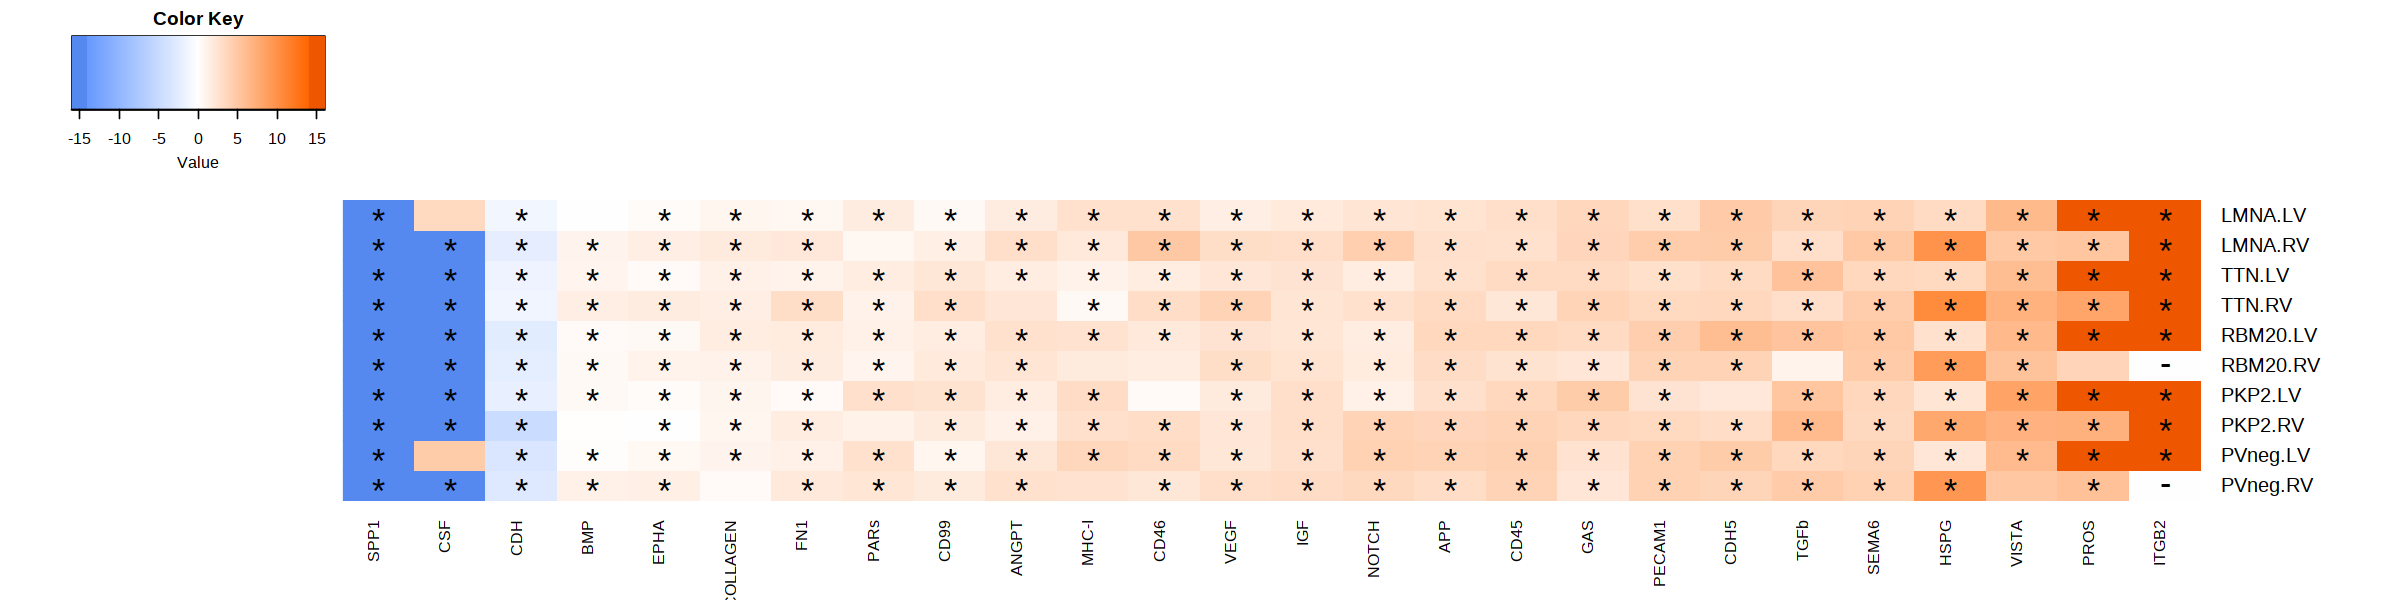

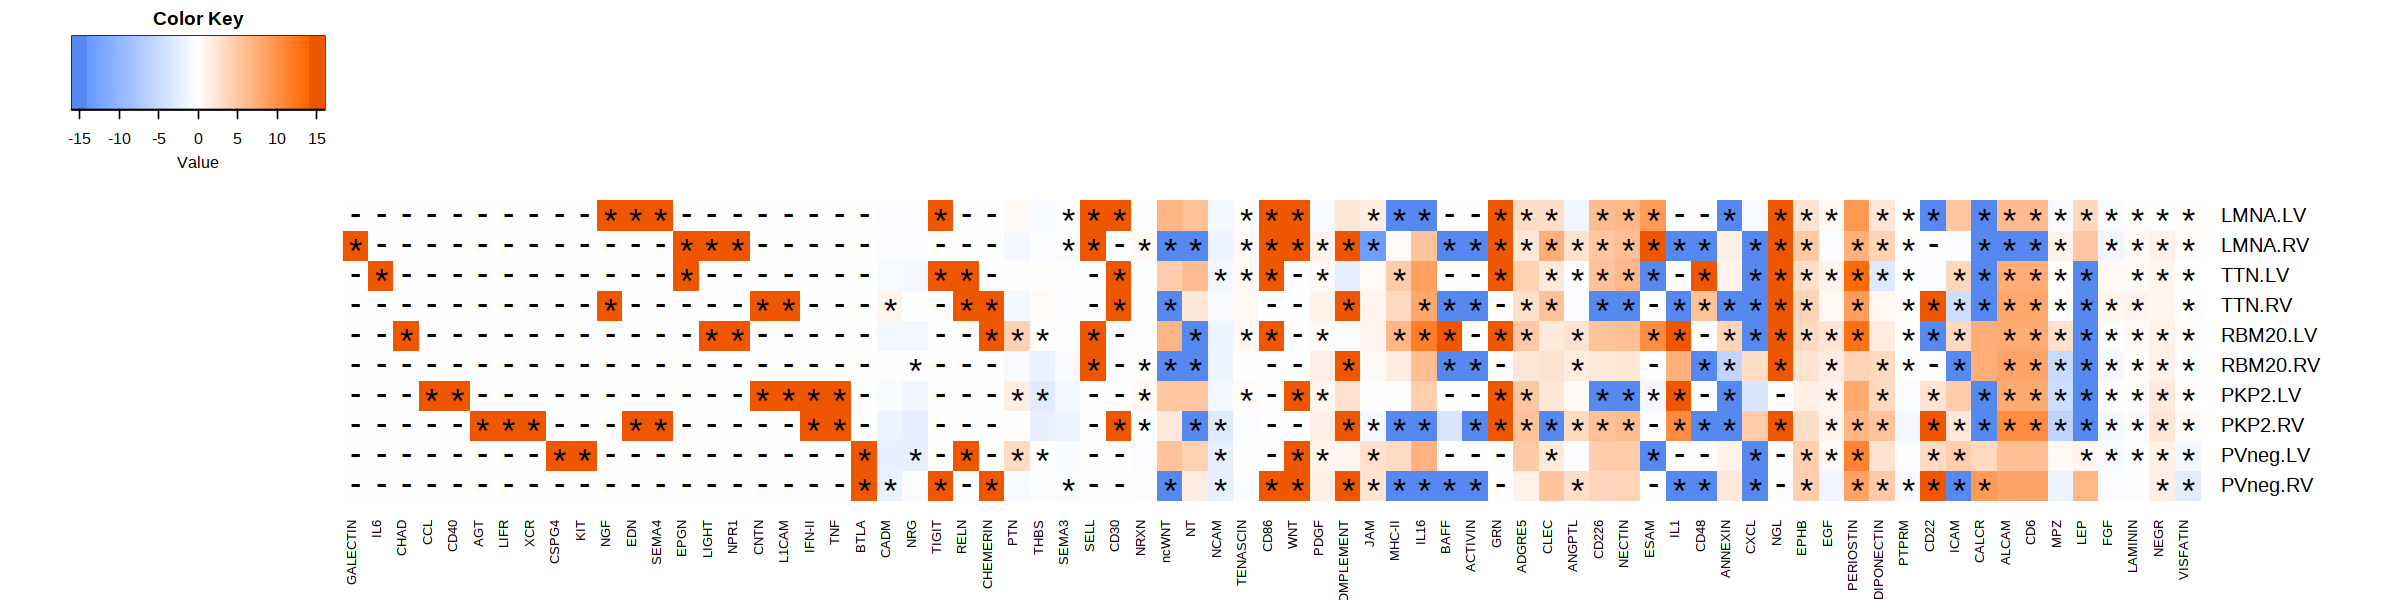

In [43]:
options(repr.plot.width = 20, repr.plot.height = 5)

heatmap.df2 <- heatmap.df

heatmap.df2$contrib[sapply(heatmap.df2$contrib, is.infinite) & heatmap.df2$contrib > 0] <- INF.VALUE
heatmap.df2$contrib[sapply(heatmap.df2$contrib, is.infinite) & heatmap.df2$contrib < 0] <- -INF.VALUE

heatmap.df2$pval[is.na(heatmap.df2$pval)] <- 2

heatmap.df2$pval <- heatmap.df2$pval[(apply(is.na(heatmap.df2$contrib), 1, sum) < 10),]
heatmap.df2$contrib <- heatmap.df2$contrib[(apply(is.na(heatmap.df2$contrib), 1, sum) < 10),]

heatmap.df2$contrib <- heatmap.df2$contrib[(apply(heatmap.df2$pval > 0.05, 1, sum) < 10),]
heatmap.df2$pval <- heatmap.df2$pval[(apply(heatmap.df2$pval > 0.05, 1, sum) < 10),]

heatmap.df2$pval[heatmap.df2$pval == 2] <- NA

heatmap.df2$sig <- heatmap.df2$pval
heatmap.df2$sig[] <- ''
heatmap.df2$sig[heatmap.df2$pval <= 0.05] <- '*'
heatmap.df2$sig[is.na(heatmap.df2$pval)] <- '-'

heatmap.df2$contrib[is.na(heatmap.df2$contrib)] <- 0

genotype.order <- c('LMNA.LV', 'LMNA.RV','TTN.LV','TTN.RV','RBM20.LV','RBM20.RV','PKP2.LV','PKP2.RV','PVneg.LV','PVneg.RV')

heatmap.df2$sig <- heatmap.df2$sig[,genotype.order]
heatmap.df2$pval <- heatmap.df2$pval[,genotype.order]
heatmap.df2$contrib <- heatmap.df2$contrib[,genotype.order]


scale.interval.size <- 0.05
num_breaks <- (MAX.CONTRIB * 2 / scale.interval.size)+1
breaks <- c(-(INF.VALUE+1), seq(from=-MAX.CONTRIB, to=MAX.CONTRIB, length.out=num_breaks), INF.VALUE+1)
midpoint <- 0 # the mid of the "real" scale

rampCol2 <- colorRampPalette(c("#6699FF", "white", "#FF6600"))(length(breaks)-1)
mypalette <- c(rampCol2)
mypalette[1] <- "#5689EF" # just a random extreme color for -inf
mypalette[num_breaks+1] <- "#EF5600" # just a random extreme color for inf

options(repr.plot.width = 20, repr.plot.height = 5)

heatmap.df3 <- heatmap.df2
heatmap.df4 <- heatmap.df2

heatmap.df3$contrib <- heatmap.df2$contrib[(apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) >=8 & apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) == 0)
                                           |(apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) >=8 & apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) == 0) ,]
heatmap.df3$sig <- heatmap.df2$sig[(apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) >=8 & apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) == 0)
                                           |(apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) >=8 & apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) == 0) ,]
heatmap.df3$sig <- heatmap.df3$sig[order(apply(heatmap.df3$contrib, 1, mean)),]
heatmap.df3$contrib <- heatmap.df3$contrib[order(apply(heatmap.df3$contrib, 1, mean)),]

heatmap.df4$contrib <- heatmap.df2$contrib[!((apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) >=8 & apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) == 0)
                                           |(apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) >=8 & apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) == 0)) ,]
heatmap.df4$sig <- heatmap.df2$sig[!((apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) >=8 & apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) == 0)
                                           |(apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) >=8 & apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) == 0)) ,]

heatmap.df4$contrib <- heatmap.df4$contrib[with(data.frame(heatmap.df4$sig == '*'), order(-LMNA.LV,-LMNA.RV,-TTN.LV,-TTN.RV,-RBM20.LV,-RBM20.RV,-PKP2.LV,-PKP2.RV,-PVneg.LV,-PVneg.RV)),]
heatmap.df4$sig <- heatmap.df4$sig[with(data.frame(heatmap.df4$sig == '*'), order(-LMNA.LV,-LMNA.RV,-TTN.LV,-TTN.RV,-RBM20.LV,-RBM20.RV,-PKP2.LV,-PKP2.RV,-PVneg.LV,-PVneg.RV)),]

heatmap.df4$change <- heatmap.df4$contrib
heatmap.df4$change[] <- 0
heatmap.df4$change[heatmap.df4$contrib > 0 & heatmap.df4$sig != ''] <- 1
heatmap.df4$change[heatmap.df4$contrib < 0 & heatmap.df4$sig != ''] <- -1
heatmap.df4$sig <- heatmap.df4$sig[order(apply(heatmap.df4$change, 1, sum), decreasing = TRUE),]
heatmap.df4$contrib <- heatmap.df4$contrib[order(apply(heatmap.df4$change, 1, sum), decreasing = TRUE),]

heatmap.df4$contrib <- heatmap.df4$contrib[order(apply(heatmap.df4$sig == '*', 1, sum)),]
heatmap.df4$sig <- heatmap.df4$sig[order(apply(heatmap.df4$sig == '*', 1, sum)),]

heatmap.2(t(heatmap.df3$contrib)
        , col=mypalette
        , Rowv=NULL  
        , Colv=NULL
        , dendrogram="none"
        , na.rm = TRUE
        , breaks=breaks, density.info="none", trace="none"
        , symm=F,symkey=F,symbreaks=T, scale="none"
        , margins = c(5,10)
        , lhei=c(2,4), lwid=c(1,6)
        , cellnote = t(heatmap.df3$sig)
        ,notecex=2.0
        ,notecol="black"
       )

heatmap.2(t(heatmap.df4$contrib)
        , col=mypalette
        , Rowv=NULL  
        , Colv=NULL
        , dendrogram="none"
        , na.rm = TRUE
        , breaks=breaks, density.info="none", trace="none"
        , symm=F,symkey=F,symbreaks=T, scale="none"
        , margins = c(5,10)
        , lhei=c(2,4), lwid=c(1,6)
        , cellnote = t(heatmap.df4$sig)
        ,notecex=2.0
        ,notecol="black"
       )

In [44]:
options(repr.plot.width = 20, repr.plot.height = 5)

heatmap.df2 <- heatmap.df

heatmap.df2$contrib[sapply(heatmap.df2$contrib, is.infinite) & heatmap.df2$contrib > 0] <- INF.VALUE
heatmap.df2$contrib[sapply(heatmap.df2$contrib, is.infinite) & heatmap.df2$contrib < 0] <- -INF.VALUE

heatmap.df2$pval[is.na(heatmap.df2$pval)] <- 2

heatmap.df2$pval <- heatmap.df2$pval[,grepl('LV',colnames(heatmap.df2$contrib))]
heatmap.df2$contrib <- heatmap.df2$contrib[,grepl('LV',colnames(heatmap.df2$contrib))]

heatmap.df2$pval <- heatmap.df2$pval[(apply(is.na(heatmap.df2$contrib), 1, sum) < 5),]
heatmap.df2$contrib <- heatmap.df2$contrib[(apply(is.na(heatmap.df2$contrib), 1, sum) < 5),]

heatmap.df2$contrib <- heatmap.df2$contrib[(apply(heatmap.df2$pval > 0.01, 1, sum) < 5),]
heatmap.df2$pval <- heatmap.df2$pval[(apply(heatmap.df2$pval > 0.01, 1, sum) < 5),]

heatmap.df2$pval[heatmap.df2$pval == 2] <- NA

heatmap.df2$sig <- heatmap.df2$pval
heatmap.df2$sig[] <- ''
heatmap.df2$sig[heatmap.df2$pval <= 0.01] <- '*'

heatmap.df2$sig[is.na(heatmap.df2$pval)] <- '-'

heatmap.df2$contrib[is.na(heatmap.df2$contrib)] <- 0

heatmap.df2$sig <- heatmap.df2$sig[,c('LMNA.LV','TTN.LV','RBM20.LV','PKP2.LV','PVneg.LV')]
heatmap.df2$pval <- heatmap.df2$pval[,c('LMNA.LV','TTN.LV','RBM20.LV','PKP2.LV','PVneg.LV')]
heatmap.df2$contrib <- heatmap.df2$contrib[,c('LMNA.LV','TTN.LV','RBM20.LV','PKP2.LV','PVneg.LV')]


scale.interval.size <- 0.05
num_breaks <- (MAX.CONTRIB * 2 / scale.interval.size)+1
breaks <- c(-(INF.VALUE+1), seq(from=-MAX.CONTRIB, to=MAX.CONTRIB, length.out=num_breaks), INF.VALUE+1)
midpoint <- 0 # the mid of the "real" scale

rampCol2 <- colorRampPalette(c("#6699FF", "white", "#FF6600"))(length(breaks)-1)
mypalette <- c(rampCol2)
mypalette[1] <- "#5689EF" # just a random extreme color for -inf
mypalette[num_breaks+1] <- "#EF5600" # just a random extreme color for inf

options(repr.plot.width = 20, repr.plot.height = 5)

heatmap.df3 <- heatmap.df2
heatmap.df4 <- heatmap.df2

heatmap.df3$contrib <- heatmap.df2$contrib[(apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) >=4 & apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) == 0)
                                           |(apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) >=4 & apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) == 0) ,]
heatmap.df3$sig <- heatmap.df2$sig[(apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) >=4 & apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) == 0)
                                           |(apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) >=4 & apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) == 0) ,]
heatmap.df3$sig <- heatmap.df3$sig[order(apply(heatmap.df3$contrib, 1, mean)),]
heatmap.df3$contrib <- heatmap.df3$contrib[order(apply(heatmap.df3$contrib, 1, mean)),]

heatmap.df4$contrib <- heatmap.df2$contrib[!((apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) >=4 & apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) == 0)
                                           |(apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) >=4 & apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) == 0)) ,]
heatmap.df4$sig <- heatmap.df2$sig[!((apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) >=4 & apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) == 0)
                                           |(apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) >=4 & apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) == 0)) ,]

heatmap.df4$contrib <- heatmap.df4$contrib[with(data.frame(heatmap.df4$sig == '*'), order(-LMNA.LV,-TTN.LV,-RBM20.LV,-PKP2.LV,-PVneg.LV)),]
heatmap.df4$sig <- heatmap.df4$sig[with(data.frame(heatmap.df4$sig == '*'), order(-LMNA.LV,-TTN.LV,-RBM20.LV,-PKP2.LV,-PVneg.LV)),]

heatmap.df4$change <- heatmap.df4$contrib
heatmap.df4$change[] <- 0
heatmap.df4$change[heatmap.df4$contrib > 0 & heatmap.df4$sig != ''] <- 1
heatmap.df4$change[heatmap.df4$contrib < 0 & heatmap.df4$sig != ''] <- -1
heatmap.df4$sig <- heatmap.df4$sig[order(apply(heatmap.df4$change, 1, sum), decreasing = TRUE),]
heatmap.df4$contrib <- heatmap.df4$contrib[order(apply(heatmap.df4$change, 1, sum), decreasing = TRUE),]

heatmap.df4$contrib <- heatmap.df4$contrib[order(apply(heatmap.df4$sig == '*', 1, sum)),]
heatmap.df4$sig <- heatmap.df4$sig[order(apply(heatmap.df4$sig == '*', 1, sum)),]


pdf(file= paste('rankNet_heatmap_LV_all_CELLTYPE_common.pdf', sep=''), width = 20, height = 5)

heatmap.2(t(heatmap.df3$contrib)
        , col=mypalette
        , Rowv=NULL  
        , Colv=NULL
        , dendrogram="none"
        , na.rm = TRUE
        , breaks=breaks, density.info="none", trace="none"
        , symm=F,symkey=F,symbreaks=T, scale="none"
        , margins = c(5,10)
        , lhei=c(2,4), lwid=c(1,6)
        , cellnote = t(heatmap.df3$sig)
        ,notecex=2.0
        ,notecol="black"
        )
graphics.off()


pdf(file= paste('rankNet_heatmap_LV_all_CELLTYPE_unique.pdf', sep=''), width = 20, height = 5)

heatmap.2(t(heatmap.df4$contrib)
        , col=mypalette
        , Rowv=NULL  
        , Colv=NULL
        , dendrogram="none"
        , na.rm = TRUE
        , breaks=breaks, density.info="none", trace="none"
        , symm=F,symkey=F,symbreaks=T, scale="none"
        , margins = c(5,10)
        , lhei=c(2,4), lwid=c(1,6)
        , cellnote = t(heatmap.df4$sig)
        ,notecex=2.0
        ,notecol="black"
       )
graphics.off()

In [45]:
options(repr.plot.width = 20, repr.plot.height = 5)

heatmap.df2 <- heatmap.df

heatmap.df2$contrib[sapply(heatmap.df2$contrib, is.infinite) & heatmap.df2$contrib > 0] <- INF.VALUE
heatmap.df2$contrib[sapply(heatmap.df2$contrib, is.infinite) & heatmap.df2$contrib < 0] <- -INF.VALUE

heatmap.df2$pval[is.na(heatmap.df2$pval)] <- 2

heatmap.df2$pval <- heatmap.df2$pval[,grepl('RV',colnames(heatmap.df2$contrib))]
heatmap.df2$contrib <- heatmap.df2$contrib[,grepl('RV',colnames(heatmap.df2$contrib))]

heatmap.df2$pval <- heatmap.df2$pval[(apply(is.na(heatmap.df2$contrib), 1, sum) < 5),]
heatmap.df2$contrib <- heatmap.df2$contrib[(apply(is.na(heatmap.df2$contrib), 1, sum) < 5),]

heatmap.df2$contrib <- heatmap.df2$contrib[(apply(heatmap.df2$pval > 0.05, 1, sum) < 5),]
heatmap.df2$pval <- heatmap.df2$pval[(apply(heatmap.df2$pval > 0.05, 1, sum) < 5),]

heatmap.df2$pval[heatmap.df2$pval == 2] <- NA

heatmap.df2$sig <- heatmap.df2$pval
heatmap.df2$sig[] <- ''
heatmap.df2$sig[heatmap.df2$pval <= 0.05] <- '*'
heatmap.df2$sig[is.na(heatmap.df2$pval)] <- '-'

heatmap.df2$contrib[is.na(heatmap.df2$contrib)] <- 0

heatmap.df2$sig <- heatmap.df2$sig[,c('LMNA.RV','TTN.RV','RBM20.RV','PKP2.RV','PVneg.RV')]
heatmap.df2$pval <- heatmap.df2$pval[,c('LMNA.RV','TTN.RV','RBM20.RV','PKP2.RV','PVneg.RV')]
heatmap.df2$contrib <- heatmap.df2$contrib[,c('LMNA.RV','TTN.RV','RBM20.RV','PKP2.RV','PVneg.RV')]

scale.interval.size <- 0.05
num_breaks <- (MAX.CONTRIB * 2 / scale.interval.size)+1
breaks <- c(-(INF.VALUE+1), seq(from=-MAX.CONTRIB, to=MAX.CONTRIB, length.out=num_breaks), INF.VALUE+1)
midpoint <- 0 # the mid of the "real" scale

rampCol2 <- colorRampPalette(c("#6699FF", "white", "#FF6600"))(length(breaks)-1)
mypalette <- c(rampCol2)
mypalette[1] <- "#5689EF" # just a random extreme color for -inf
mypalette[num_breaks+1] <- "#EF5600" # just a random extreme color for inf

options(repr.plot.width = 20, repr.plot.height = 5)

heatmap.df3 <- heatmap.df2
heatmap.df4 <- heatmap.df2

heatmap.df3$contrib <- heatmap.df2$contrib[(apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) >=4 & apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) == 0)
                                           |(apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) >=4 & apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) == 0) ,]
heatmap.df3$sig <- heatmap.df2$sig[(apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) >=4 & apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) == 0)
                                           |(apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) >=4 & apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) == 0) ,]
heatmap.df3$sig <- heatmap.df3$sig[order(apply(heatmap.df3$contrib, 1, mean)),]
heatmap.df3$contrib <- heatmap.df3$contrib[order(apply(heatmap.df3$contrib, 1, mean)),]

heatmap.df4$contrib <- heatmap.df2$contrib[!((apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) >=4 & apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) == 0)
                                           |(apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) >=4 & apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) == 0)) ,]
heatmap.df4$sig <- heatmap.df2$sig[!((apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) >=4 & apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) == 0)
                                           |(apply(heatmap.df2$contrib < 0 & heatmap.df2$sig != '', 1, sum) >=4 & apply(heatmap.df2$contrib > 0 & heatmap.df2$sig != '', 1, sum) == 0)) ,]

heatmap.df4$contrib <- heatmap.df4$contrib[with(data.frame(heatmap.df4$sig == '*'), order(-LMNA.RV,-TTN.RV,-RBM20.RV,-PKP2.RV,-PVneg.RV)),]
heatmap.df4$sig <- heatmap.df4$sig[with(data.frame(heatmap.df4$sig == '*'), order(-LMNA.RV,-TTN.RV,-RBM20.RV,-PKP2.RV,-PVneg.RV)),]

heatmap.df4$change <- heatmap.df4$contrib
heatmap.df4$change[] <- 0
heatmap.df4$change[heatmap.df4$contrib > 0 & heatmap.df4$sig != ''] <- 1
heatmap.df4$change[heatmap.df4$contrib < 0 & heatmap.df4$sig != ''] <- -1
heatmap.df4$sig <- heatmap.df4$sig[order(apply(heatmap.df4$change, 1, sum), decreasing = TRUE),]
heatmap.df4$contrib <- heatmap.df4$contrib[order(apply(heatmap.df4$change, 1, sum), decreasing = TRUE),]

heatmap.df4$contrib <- heatmap.df4$contrib[order(apply(heatmap.df4$sig == '*', 1, sum)),]
heatmap.df4$sig <- heatmap.df4$sig[order(apply(heatmap.df4$sig == '*', 1, sum)),]


pdf(file= paste('rankNet_heatmap_RV_all_CELLTYPE_common.pdf', sep=''), width = 20, height = 5)

heatmap.2(t(heatmap.df3$contrib)
        , col=mypalette
        , Rowv=NULL  
        , Colv=NULL
        , dendrogram="none"
        , na.rm = TRUE
        , breaks=breaks, density.info="none", trace="none"
        , symm=F,symkey=F,symbreaks=T, scale="none"
        , margins = c(5,10)
        , lhei=c(2,4), lwid=c(1,6)
        , cellnote = t(heatmap.df3$sig)
        ,notecex=2.0
        ,notecol="black"
        )
graphics.off()


pdf(file= paste('rankNet_heatmap_RV_all_CELLTYPE_unique.pdf', sep=''), width = 20, height = 5)

heatmap.2(t(heatmap.df4$contrib)
        , col=mypalette
        , Rowv=NULL  
        , Colv=NULL
        , dendrogram="none"
        , na.rm = TRUE
        , breaks=breaks, density.info="none", trace="none"
        , symm=F,symkey=F,symbreaks=T, scale="none"
        , margins = c(5,10)
        , lhei=c(2,4), lwid=c(1,6)
        , cellnote = t(heatmap.df4$sig)
        ,notecex=2.0
        ,notecol="black"
       )
graphics.off()

## Cell state or type specific